<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-7/7_XGB_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Lecture 7 - XGB - melb_data.csv

---

*   Sulthan Nauval Abdillah
*   1103213065


#Import Dataset

In [1]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df = pd.read_csv("/content/drive/MyDrive/Datasets/melb_data.csv")

df

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

#Membuat Heatmap Kolom Numerik

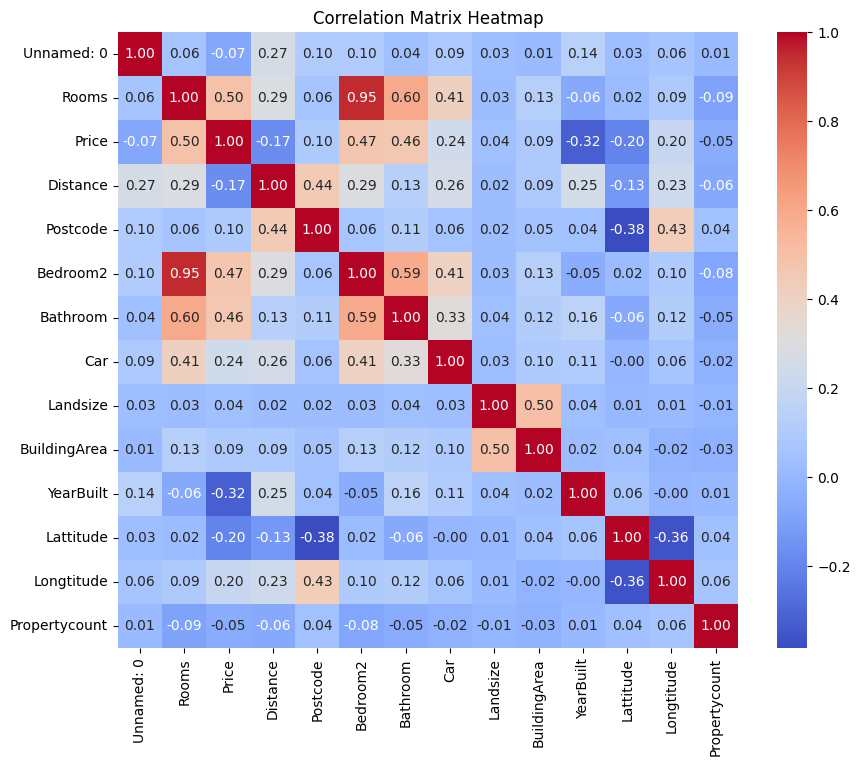

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#Mengambil Kolom Tertentu Saja yang Diperlukan untuk Pair Plot

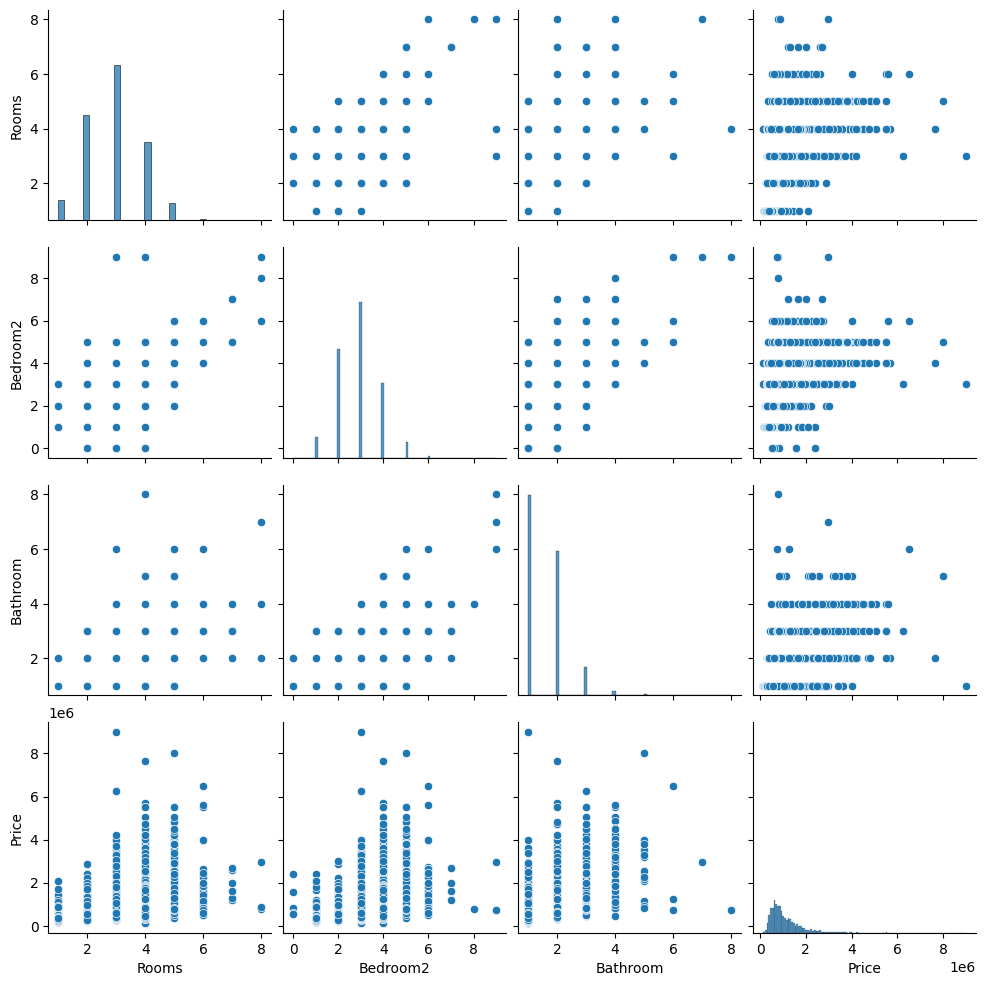

In [4]:
# For demonstration, let's say we drop some columns and handle missing values
df.dropna(inplace=True) # Drop rows with missing target
selected_columns = ['Rooms', 'Bedroom2', 'Bathroom', 'Price']
data = df[selected_columns]

# Visualize the data
sns.pairplot(data)
plt.show()

#Training Model XGBoost, Random Forest, Decision Tree

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets (70% train, 30% test)
X = data.drop('Price', axis=1)  # Features
y = data['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models: XGBoost, Random Forest, Decision Tree
# XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

#Evaluate Model

In [6]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Evaluate XGBoost model
xgb_mse = evaluate_model(xgb_model, X_test, y_test)
print(f"XGBoost Mean Squared Error: {xgb_mse}")

# Evaluate Random Forest model
rf_mse = evaluate_model(rf_model, X_test, y_test)
print(f"Random Forest Mean Squared Error: {rf_mse}")

# Evaluate Decision Tree model
dt_mse = evaluate_model(dt_model, X_test, y_test)
print(f"Decision Tree Mean Squared Error: {dt_mse}")

XGBoost Mean Squared Error: 282094384295.2544
Random Forest Mean Squared Error: 272447503620.96262
Decision Tree Mean Squared Error: 282457874613.85504
